In [1]:
#!/bin/env python3

# This script is used to generate the clickstream data for a fake website.
# Website: goose.birds
# Format: Google Analytics

from fake_web_events import Simulation
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
# import pyarrow as pa
# import duckdb

In [2]:
def create_events_file():
    simulation = Simulation(user_pool_size=1000, sessions_per_day=10000)
    events = simulation.run(duration_seconds=3000)

    with open('events.json', 'w') as f:
        f.write(json.dumps(list(events)))

In [3]:
# If events.json already exists, skip this step

if not os.path.exists('events.json'):
    print('Generating events.json')
    create_events_file()


event_hour
2023-04-04 20     721
2023-04-04 21    1039
2023-04-04 22     815
2023-04-04 23     744
2023-04-05 00     686
                 ... 
2023-04-30 21     988
2023-04-30 22     841
2023-04-30 23     753
2023-05-01 00     679
2023-05-01 01      99
Name: user_domain_id, Length: 630, dtype: int64


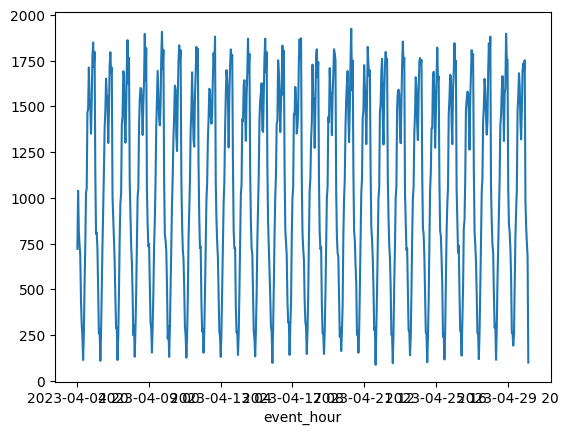

page_url_path
/home            270884
/product_a       152947
/product_b       100420
/cart             67882
/payment          44927
/confirmation     32781
Name: count, dtype: int64


In [4]:
df = pd.read_json('events.json', orient='records')
df['event_hour'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%Y-%m-%d %H')

events_per_hour = df.groupby('event_hour')['user_domain_id'].count()
print(events_per_hour)

events_per_hour.plot.line()
plt.show()

page_count = df['page_url_path'].value_counts()
print(page_count)